# Question 1: Prediction of amount spend

## Build Model to determine totshopping.rep
Regression model metrics
1. RMSE : Root Mean Square Error 
More penalize the error value more heavily

Assumptions made for building this model.
1. Fill all null values as zero *This is a sweeping statement and should not be taken in real life context
2. rows with more than 90% missing data is excluded out.
3. Overall minimum correlation of 0.4 to observe outliers. 

Approach considered
1. Linear Regression Model
2. Linear Regression Lasso Model 
3. Combine both model features where coefficient exceed 1(set as a baseline minimum)
4. Use Lasso Model to evaluate and predict df['totshopping.rep']

Explaination for approach
1. It includes missing features of both models and lastly use Lasso to predict as it 

Confident in model robustness/ Explain model performance
1. model is sufficient robust as no. of features taken is approx 24

Explain if model is performing well/not well
1. Model is performing well. RMSE is low

Feature Engineering 

1. Only standardscalar is used 

## Conclusions:
1. Feature engineering could be more extensive
2. Sweeping statement such as fillna value = 0 should be avoided in real life context
3. included more models and use the average of the models to predict 'totshopping.rep
4. A dictionary to explain what the columns are

# Import Libraries for Data Exploration

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import fnmatch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


## Data Exploration and Cleaning

In [8]:
df_test = pd.read_csv("/Users/YLChua/Desktop/stb/testdata.csv")
df_spend = pd.read_csv("/Users/YLChua/Desktop/stb/spendata.csv" )
df_test.shape,df_spend.shape

((4595, 300), (18379, 301))

In [9]:
df_spend.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,1,2.0,NaN,1,5,1,57,34,1,...,1,0,0,0,1,0,0,0,5.0,NaN
1,2,1,2.0,NaN,1,4,1,57,34,2,...,0,0,0,0,0,0,1,0,NaN,NaN
2,3,1,2.0,NaN,1,5,1,57,42,2,...,0,0,0,0,0,0,0,0,3.0,NaN
3,4,1,2.0,NaN,1,6,1,57,34,2,...,0,0,0,0,1,0,1,0,5.0,NaN
4,5,1,2.0,NaN,1,8,1,22,1,1,...,0,0,0,0,0,0,0,0,5.0,NaN


In [10]:
df_test.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
0,9,1,1.0,NaN,1,11,1,47,8,2,...,0,0,0,0,0,0,0,1,0,3.0
1,15,1,2.0,NaN,1,11,1,65,27,1,...,0,1,0,0,0,0,0,0,0,3.0
2,16,1,2.0,NaN,1,6,1,65,27,2,...,0,0,0,0,0,0,0,1,0,3.0
3,24,1,1.0,NaN,1,3,1,3,2,1,...,0,0,0,0,0,0,0,0,0,NaN
4,32,1,1.0,NaN,1,5,1,83,3,1,...,0,1,0,0,0,1,0,0,0,NaN


In [11]:
df_spend.drop(columns='Unnamed: 0', inplace=True)

In [12]:
df_spend.drop(columns='t.158', inplace=True)

In [13]:
df_spend.describe().T

,count,mean,std,min,25%,50%,75%,max
month,18379.0,6.504054,3.468736,1.0,4.0,7.0,9.0,12.0
var8,14370.0,1.967780,0.845175,1.0,1.0,2.0,3.0,3.0
var6,1899.0,2.380200,0.812020,1.0,2.0,2.0,3.0,4.0
a.1,18379.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
a.2,18379.0,6.339681,2.450582,1.0,4.0,6.0,8.0,12.0
...,...,...,...,...,...,...,...,...
c.280,18379.0,0.142336,0.349404,0.0,0.0,0.0,0.0,1.0
c.281,18379.0,0.038359,0.192067,0.0,0.0,0.0,0.0,1.0
c.282,18379.0,0.070352,0.255746,0.0,0.0,0.0,0.0,1.0
c.283,18379.0,0.017683,0.131801,0.0,0.0,0.0,0.0,1.0


## Data Cleaning and Visualisation
1. Null Values elimination
2. Change object columns to numeric
2. Outliers elimination through visualisation

### Assumptions : 
1. Columns that has more than 90% null values are meant to target specific minority groups that does not represent the masses spening amount.
2. Removal of this columns would give a better overall generalization of spending amount; 'totshopping.rep'
3. Due to limited information provided, this approach is taken

Eliminate columns with less than 90% value 



In [19]:
# maximum no. of rows of null results within a single column
no_of_rows = round(df_spend.shape[0]*0.90,0)
no_of_rows

16541.0

In [33]:
# list of columns where no. of rows 'isnull' do not exceed 10% (90% filled with data)
# this list of columns will be applied to testdata later on
col = df_spend.isnull().sum()[(df_spend.isnull().sum() <= no_of_rows)].index.tolist()
len(col) # number of columns = 270 without 'totshopping.rep'

271

In [34]:
df = df_spend[col]

In [35]:
# check if there are any missing value within 'totshopping.rep'
df['totshopping.rep'].isnull().sum()

0

### Ensure that object columns are change to numeric for modelling

In [36]:
# Divide out into 3 groups by 'dtypes' to check individual groups
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['month', 'a.1', 'a.2', 'a.3', 'a.4', 'var5', 'b.5', 'b.7', 'b.9',
        'b.12',
        ...
        'c.274', 'c.275', 'c.276', 'c.277', 'c.278', 'c.279', 'c.280', 'c.281',
        'c.282', 'c.283'],
       dtype='object', length=164),
 dtype('float64'): Index(['var8', 'var6', 'b.6', 'b.8', 'b.10', 'b.11', 'b.13', 'b.14', 'b.17',
        'b.18',
        ...
        'a.186', 'var2', 'totshopping.rep', 'c.189', 'c.190', 'b.195', 'c.214',
        'c.222', 'c.250', 'f.284'],
       dtype='object', length=105),
 dtype('O'): Index(['var9', 'respondent.id'], dtype='object')}

Resolve 'object' related series within dataframe first
Assumptions: 
1. if it is category related, will recategorise it into 1, 2, 3,...


In [37]:
#this means that respondent id can be taken as the id of the person taking the survey
len(df['respondent.id'].unique())

18379

In [38]:
df.drop(columns='respondent.id', inplace=True)

In [39]:
len(df.columns)

270

In [40]:
df.select_dtypes(include='object').head()

,var9
0,Mono
1,Mono
2,Multi
3,Mono
4,Multi


Var9 => category related 

In [41]:
#  check for null value
df['var9'].isnull().sum()

237

In [42]:
# Assumption => null : 0, mono : 1, Multi : 2 
df['var9'].unique()

array(['Mono', 'Multi', nan], dtype=object)

In [43]:
df['var9'].fillna(value = 0, inplace = True)
df['var9'].isnull().sum()

/Users/YLChua/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [44]:
df = df.replace({'var9':{'Mono': 1,'Multi': 2}})
df['var9'].unique()

array([1, 2, 0])

### Null values are assume to be 0 as mention above
1. All columns are in numeric form with missing values(null values)
2. Approach => fill all missing values = 0

In [45]:
df.isnull().sum()[(df.isnull().sum() != 0)]

var8       4009
var6      16480
b.6        8079
b.8        1773
b.10      16007
b.11      16007
b.13      11683
b.14      11920
b.20      14234
b.21      15098
c.31      15225
c.39       5359
c.48       4475
c.60       7984
c.77         78
c.92       3090
e.101      4241
f.105     16159
f.106     16160
f.107     16378
f.112     15825
f.113     14983
var4       3090
c.125        77
c.135        67
c.140         4
c.141         3
c.145         1
c.147         1
c.148         1
t7.149       67
t7.153        4
t7.154        2
t7.157        3
t7.158       76
a.183      5360
c.189       298
c.190      5361
b.195     14605
c.214      5356
c.222     15012
c.250       221
f.284      4418
dtype: int64

### Assumption: Fill all null values as zero. 

* This is a sweeping statement * In real case sceniro mean/ medium or average value might be more suitable to 'fill in' Nan values 

In [46]:
df.fillna(value=0,inplace=True)

In [47]:
# Double check if there are any null values left
df.isnull().sum().sum()

0

In [48]:
col = df.columns.tolist()
col.remove('totshopping.rep')

### Method of approach for EDA and elimination of outliers through Regplot
1. Heatmap for correlation of columns against totshopping.rep
2. normal distribution of correlation above 0.4 (anything less would not be able to show sufficient correlation for modelling

In [49]:
df.corr()[['totshopping.rep']].isnull().head()

,totshopping.rep
month,False
var8,False
var6,False
a.1,True
a.2,False


Null values are checked by plotting Histogram

1. Divide columns into groups 'var', 'a.', 'b.',...
2. Plot histogram for individual group 'a.'

In [50]:
a_cols = fnmatch.filter(df.columns,'*a.*')
b_cols = fnmatch.filter(df.columns,'*b.*')
c_cols = fnmatch.filter(df.columns,'*c.*')
d_cols = fnmatch.filter(df_spend.columns,'*d.*')
e_cols = fnmatch.filter(df_spend.columns,'*e.*')
f_cols = fnmatch.filter(df_spend.columns,'*f.*')
pp_cols = fnmatch.filter(df_spend,'*pp.*')
t_cols = fnmatch.filter(df_spend,'*t.*')
t7_cols = fnmatch.filter(df_spend.columns,'*t7.*')


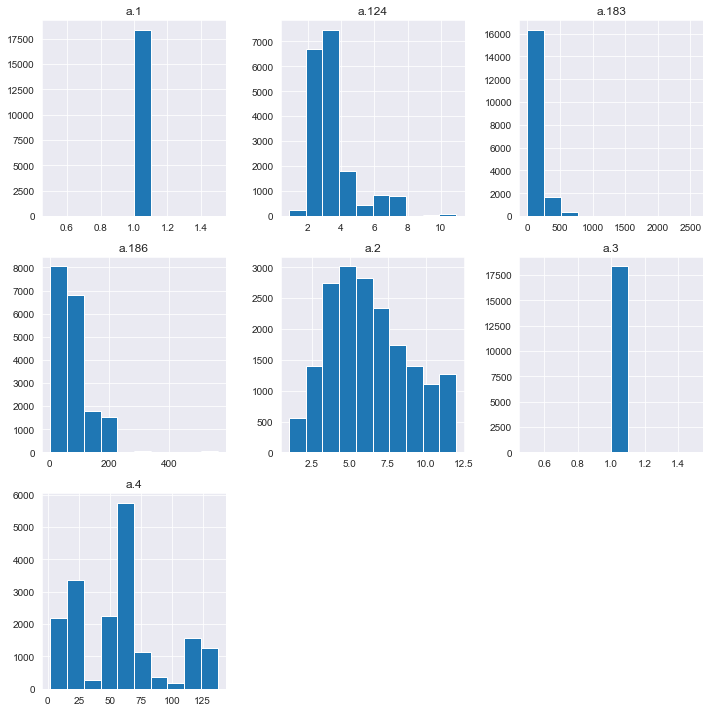

In [51]:
df[a_cols].hist(figsize=(10,10))
plt.tight_layout()
plt.show();

From this we can see that a.1 and a.3 are singluarity columns that does not provide an correlation to the overall modelling of totshopping.rep

In [52]:
df_corr = df.corr()[['totshopping.rep']][(df.corr()[['totshopping.rep']]> 0.4)].dropna(axis = 0).sort_values(by='totshopping.rep', ascending = False)
df_corr

,totshopping.rep
totshopping.rep,1.000000
var2,0.985883
c.125,0.847490
t7.158,0.776905
c.77,0.731094
c.135,0.514583
t7.149,0.514583
t7.152,0.490843
c.139,0.450907
c.82,0.400681


(10, 1)

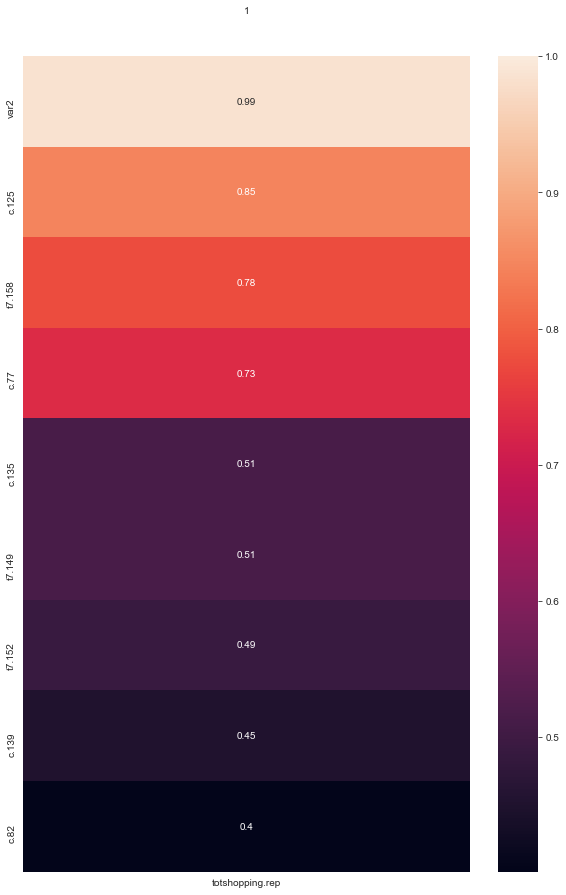

In [53]:
fig = plt.figure(figsize=(10,15))
ax = sns.heatmap(df_corr,annot = True)
ax.get_ylim()
ax.set_ylim(10,1)

In [54]:
col = df_corr.index.tolist()
col.pop(0)
col

['var2',
 'c.125',
 't7.158',
 'c.77',
 'c.135',
 't7.149',
 't7.152',
 'c.139',
 'c.82']

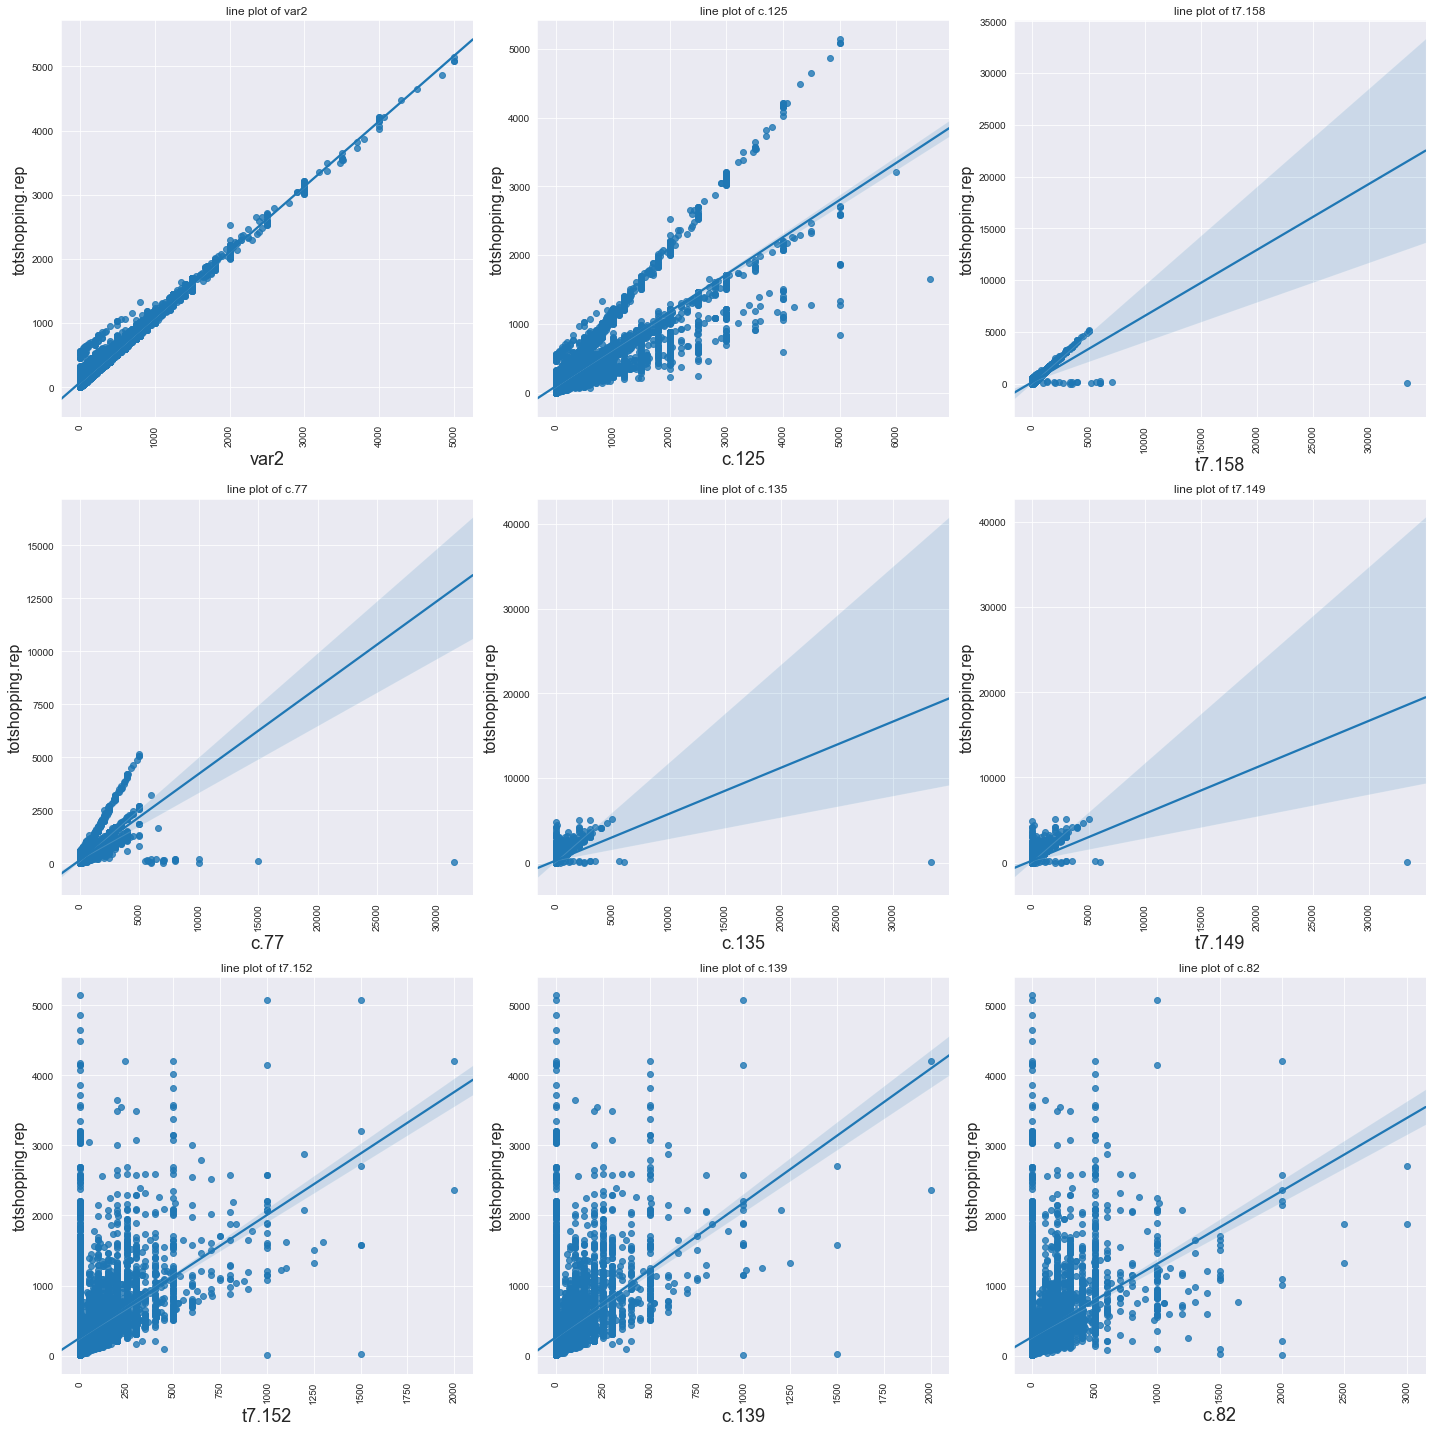

In [55]:
fig = plt.figure(figsize=(20,20))
for i, v in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.regplot(x=v, y='totshopping.rep', data=df)
    plt.title('line plot of {}'.format(v)) 
    plt.xlabel(v, fontsize=18)
    plt.ylabel('totshopping.rep', fontsize=16)
    plt.xticks(rotation='vertical')
plt.tight_layout() 

its clear that in t7.158, c.77, c.135, t7.149 all show cases of outliers in the extreme right corner of the regplot

In [56]:
df[['t7.158']][(df[['t7.158']] >10000)].dropna()

,t7.158
10545,33333.0


In [57]:
#  Eliminate outlier
df[col].loc[10545]

var2          0.0
c.125         0.0
t7.158    33333.0
c.77          0.0
c.135     33333.0
t7.149    33333.0
t7.152        0.0
c.139         0.0
c.82          0.0
Name: 10545, dtype: float64

In [58]:
df[['c.77']][(df[['c.77']] >10000)].dropna()

,c.77
3144,31467.4
18169,15000.0


In [59]:
#  Eliminate outlier
df[col].loc[3144]

var2          0.0
c.125         0.0
t7.158     5244.5
c.77      31467.4
c.135         0.0
t7.149        0.0
t7.152        0.0
c.139         0.0
c.82          0.0
Name: 3144, dtype: float64

In [60]:
# Eliminate Possible Outliers 
df.drop(index = [10545,3144,18169], inplace=True)
df.shape

(18376, 270)

Identify Possible Features with high correlation for Modelling 
1. Absolute Value of 0.4 is taken as a minimum correlation Factor.

In [61]:
#  positive correlation more than 0.4
df_corr = df.corr()[['totshopping.rep']][(df.corr()[['totshopping.rep']]> 0.4)].dropna(axis = 0).sort_values(by='totshopping.rep', ascending = False)
df_corr

,totshopping.rep
totshopping.rep,1.000000
var2,0.985882
t7.158,0.930902
c.125,0.847478
c.77,0.792530
c.135,0.726394
t7.149,0.726394
c.78,0.645327
t7.152,0.490840
c.139,0.450911


In [62]:
#  nevgative correlation less than -0.4
df_corr_nev = df.corr()[['totshopping.rep']][(df.corr()[['totshopping.rep']]< -0.4)].dropna(axis = 0).sort_values(by='totshopping.rep', ascending = False)
df_corr_nev

,totshopping.rep


In [63]:
col = df_corr.index.tolist()
col.pop(0)
col, len(col)

(['var2',
  't7.158',
  'c.125',
  'c.77',
  'c.135',
  't7.149',
  'c.78',
  't7.152',
  'c.139',
  'c.82'],
 10)

1. A total of 10 Features are selected (This 10 Features are taken into account for modelling in later stage)
2. There is an increase in correlation after elimination of outlier

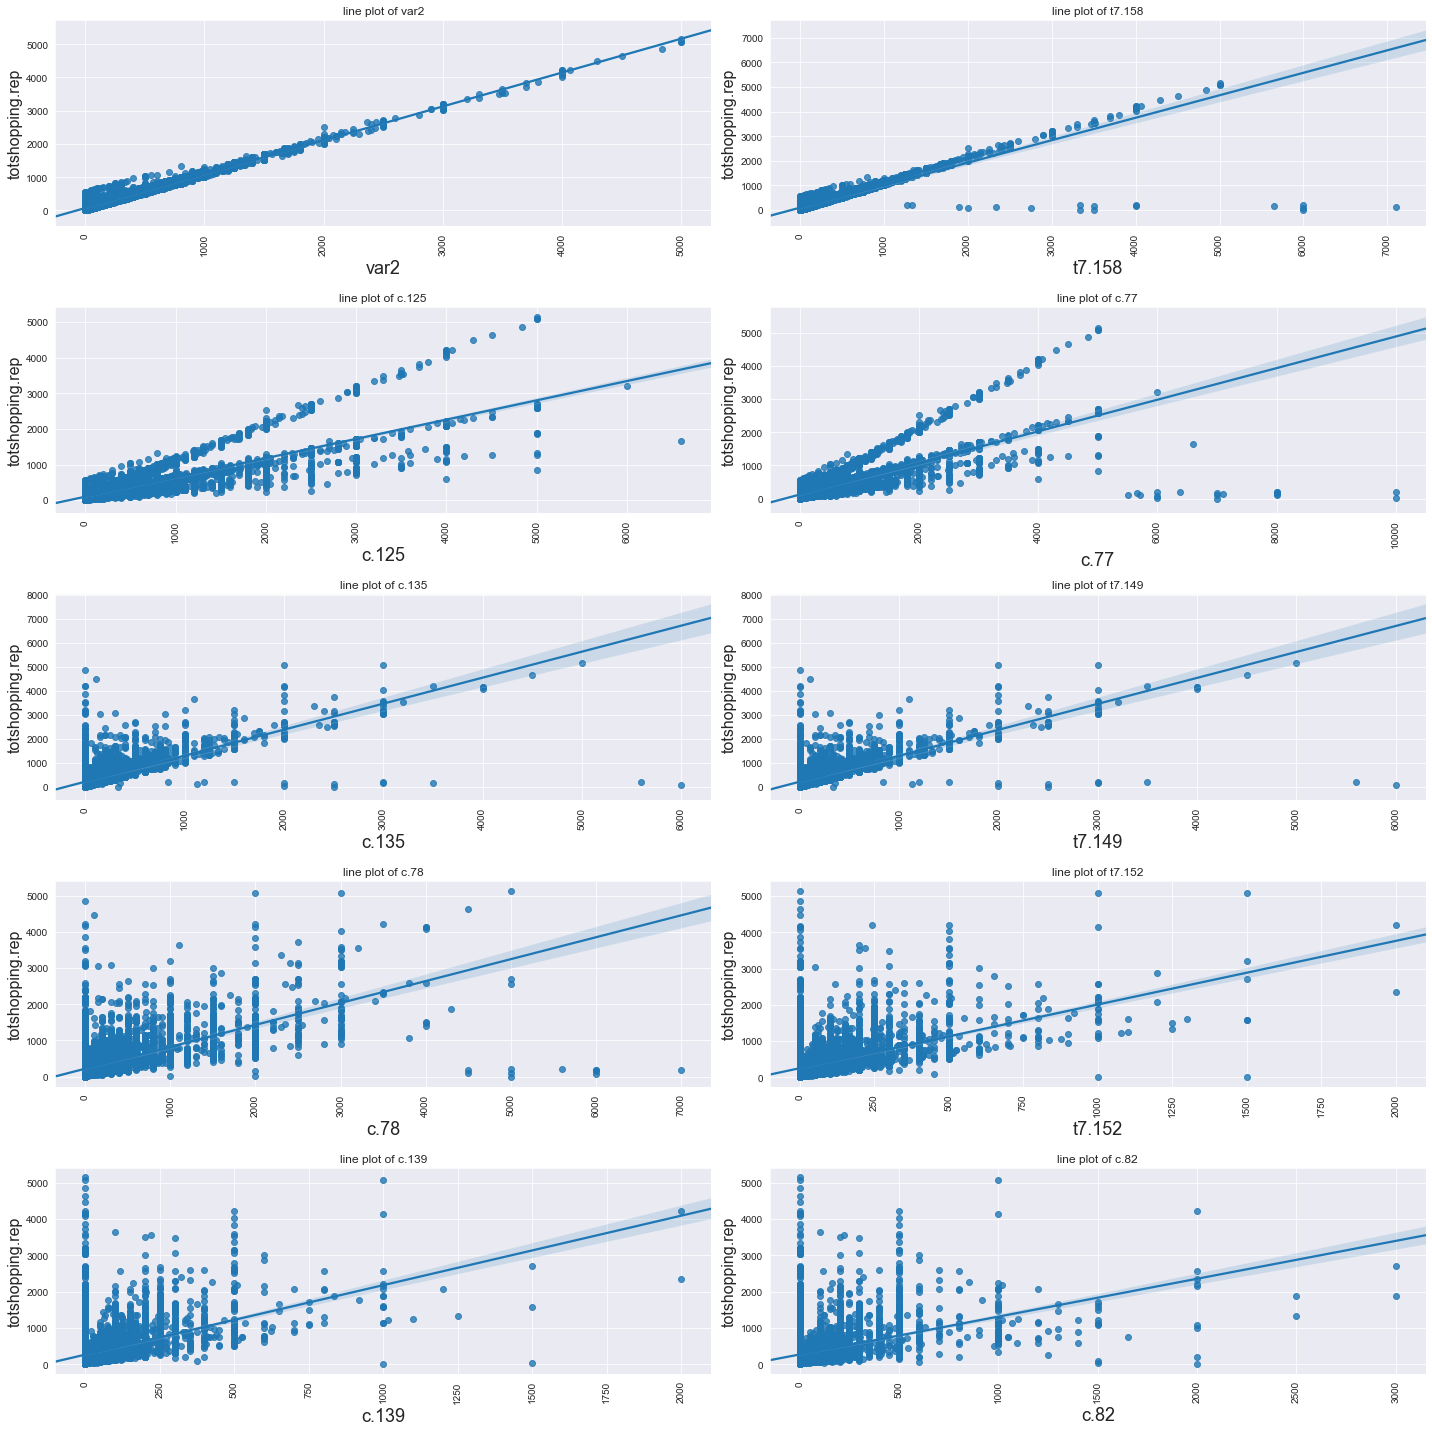

In [64]:
fig = plt.figure(figsize=(20,20))
for i, v in enumerate(col):
    plt.subplot(5,2,i+1)
    sns.regplot(x=v, y='totshopping.rep', data=df)
    plt.title('line plot of {}'.format(v)) 
    plt.xlabel(v, fontsize=18)
    plt.ylabel('totshopping.rep', fontsize=16)
    plt.xticks(rotation='vertical')
plt.tight_layout() 

#### It is important to note that most graph follows a linear relationship

### Save all cleaned data to csv and do the same for df_test

In [65]:
df.to_csv('spenddata_cleaned.csv', index = False)

In [66]:
col = df.columns.tolist()
col.remove('totshopping.rep')

In [67]:
df_test_edit = df_test[col]

In [68]:
### Fillna for df_test

In [69]:
df_test_edit.fillna(value=0,inplace=True)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [70]:
df_test_edit.to_csv('testdata_cleaned.csv', index=False)

# Import modelling Libraries (sklearn)

In [71]:
#sklibrary
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [72]:
df_train = pd.read_csv('spenddata_cleaned.csv', index_col = None)
df_test  = pd.read_csv('testdata_cleaned.csv', index_col = None)
df_test.shape, df_train.shape

((4595, 269), (18376, 270))

Test Data Does not contain totshopping.rep

In [73]:
df_train.head()

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
0,1,2.0,0.0,1,5,1,57,34,1,0.0,...,0,1,0,0,0,1,0,0,0,5.0
1,1,2.0,0.0,1,4,1,57,34,2,3.0,...,0,0,0,0,0,0,0,1,0,0.0
2,1,2.0,0.0,1,5,1,57,42,2,1.0,...,0,0,0,0,0,0,0,0,0,3.0
3,1,2.0,0.0,1,6,1,57,34,2,4.0,...,0,0,0,0,0,1,0,1,0,5.0
4,1,2.0,0.0,1,8,1,22,1,1,0.0,...,0,0,0,0,0,0,0,0,0,5.0


In [74]:
df_test.head()

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
0,1,1.0,0.0,1,11,1,47,8,2,1.0,...,0,0,0,0,0,0,0,1,0,3.0
1,1,2.0,0.0,1,11,1,65,27,1,0.0,...,0,1,0,0,0,0,0,0,0,3.0
2,1,2.0,0.0,1,6,1,65,27,2,1.0,...,0,0,0,0,0,0,0,1,0,3.0
3,1,1.0,0.0,1,3,1,3,2,1,0.0,...,0,0,0,0,0,0,0,0,0,0.0
4,1,1.0,0.0,1,5,1,83,3,1,0.0,...,0,1,0,0,0,1,0,0,0,0.0


In [117]:
features = df_train.columns.tolist()
features.remove('totshopping.rep')
len(features)

269

In [118]:
X = df_train[features]
y = df_train['totshopping.rep']

## Model Prep: Train/test split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14700, 269), (3676, 269), (14700,), (3676,))

In [120]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Function for running regression

In [121]:
# combine types of regression
def regression(reg,X_train_ss, X_test_ss, y_train, y_test,features):
    
    print(X_train_ss.shape, X_test_ss.shape, y_train.shape, y_test.shape)
    score = cross_val_score(reg, X_train_ss, y_train, cv = 10)
    reg.fit(X_train_ss,y_train)

    pred = reg.predict(X_test_ss)
    rmse= np.sqrt(mean_squared_error(y_test, pred))
    print(reg)
    print('Train RMSE:', rmse)
    print(' ')
    pd.Series(reg.coef_,index =features ).plot.bar(figsize=(15,7))
    plt.show()
    print(' ')
    reg_coeff =dict(zip(features,(reg.coef_)))
    return reg_coeff   

## 1st Model Linear Regression Model

(14700, 269) (3676, 269) (14700,) (3676,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train RMSE: 0.03888224840045629
 


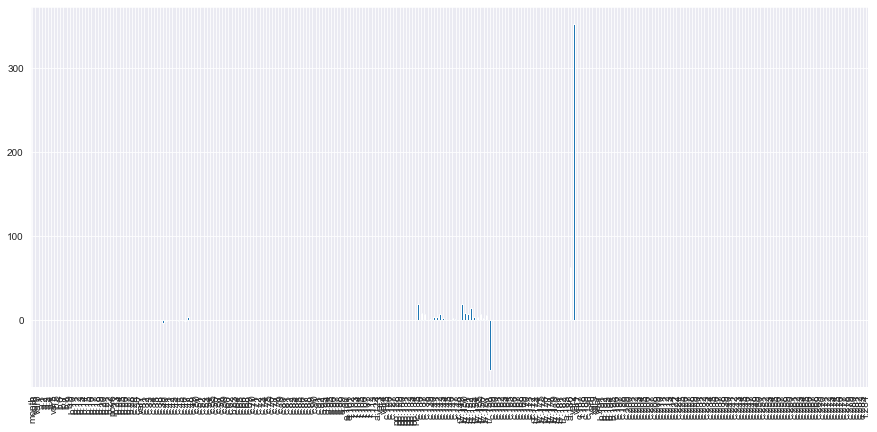

In [122]:
lr = LinearRegression()
lr_coeff = regression(lr,X_train_ss, X_test_ss, y_train, y_test,features)

In [104]:
df_lr_coeff = pd.DataFrame.from_dict(lr_coeff, orient='index')
df_lr_coeff.rename(columns={0:'coeff'},inplace = True)

lr_features = df_lr_coeff[['coeff']][(abs(df_lr_coeff[['coeff']])>1)].dropna().index.tolist()

print('no. of features :',len(lr_features))
lr_features

no. of features : 24


['c.39',
 'c.47',
 'c.135',
 'c.136',
 'c.137',
 'c.139',
 'c.140',
 'c.141',
 'c.142',
 'c.143',
 'c.146',
 'c.147',
 't7.149',
 't7.150',
 't7.151',
 't7.152',
 't7.153',
 't7.154',
 't7.155',
 't7.156',
 't7.157',
 't7.158',
 'a.186',
 'var2']

### 2nd Model : Linear Regression Lasso Model

(14700, 269) (3676, 269) (14700,) (3676,)
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Train RMSE: 1.6334664073399843
 


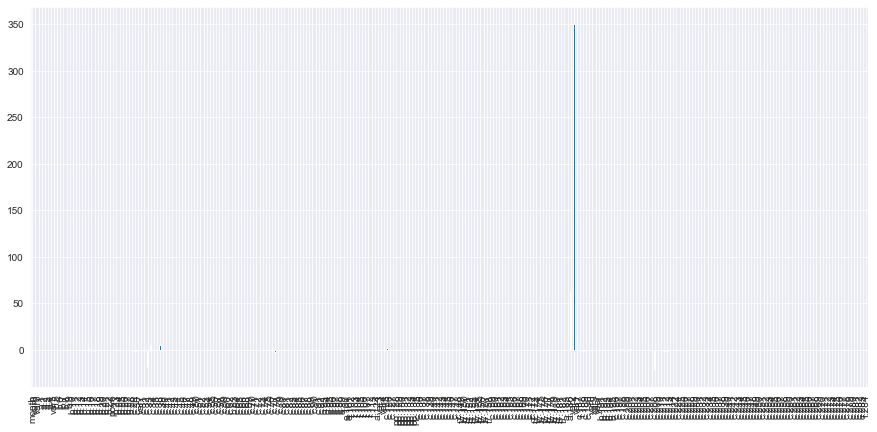

In [123]:
lasso_search = LassoCV(alphas = np.arange(0.001, 1.0, 0.001), cv=3)
lasso_search.fit(X_train_ss,y_train)
lasso = Lasso(alpha= lasso_search.alpha_)
lasso_coeff = regression(lasso,X_train_ss, X_test_ss, y_train, y_test,features)

## Select features with coefficient that are not equal to zero (> 10) 

In [103]:
df_lasso_coeff = pd.DataFrame.from_dict(lasso_coeff, orient='index')
df_lasso_coeff.rename(columns={0:'coeff'},inplace = True)

lasso_features = df_lasso_coeff[['coeff']][(abs(df_lasso_coeff[['coeff']])>1)].dropna().index.tolist()

print('no. of features :',len(lasso_features))
lasso_features

no. of features : 15


['b.15',
 'b.17',
 'c.29',
 'c.32',
 'c.33',
 'c.38',
 'c.77',
 'c.125',
 'c.135',
 'a.186',
 'var2',
 'f.188',
 'c.197',
 'c.208',
 'c.212']

In [106]:
full_features = list(set(lasso_features + lr_features))
full_features, len(full_features)

(['c.136',
  'c.77',
  'c.143',
  'c.29',
  't7.149',
  't7.152',
  'c.140',
  'c.135',
  't7.157',
  't7.154',
  't7.158',
  'c.137',
  'c.125',
  'c.146',
  'c.47',
  'c.39',
  'c.197',
  'var2',
  't7.155',
  'c.208',
  'c.212',
  'b.17',
  'c.141',
  't7.150',
  'c.142',
  'c.139',
  't7.151',
  'c.33',
  'a.186',
  't7.156',
  'b.15',
  'c.147',
  'f.188',
  't7.153',
  'c.38',
  'c.32'],
 36)

## Use These Features to predict 'totshopping.rep'


## Finalise File Will contain 'Respondent.id', 'totshopping.rep'

In [107]:
def submission_df(predict):
    df_test_original = pd.read_csv("/Users/YLChua/Desktop/stb/testdata.csv")
    df_sumbit = pd.DataFrame(df_test_original['respondent.id'])
    df_sumbit['totshopping.rep'] = predict
    df_sumbit.set_index(['respondent.id'], inplace = True)
    df_sumbit.to_csv('answer.csv')

### Prediction

In [108]:
# 36 Features are used

X = df_train[full_features]
y = df_train['totshopping.rep']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=27)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss  = ss.transform(df_test[full_features])

lasso_search = LassoCV(alphas=np.logspace(0,5,200), cv=3)
lasso_search.fit(X_train_ss,y_train)
lasso = Lasso(alpha= lasso_search.alpha_)

lasso.fit(X_train_ss,y_train)
pred = lasso.predict(X_test_ss)
pred

(14700, 36) (3676, 36) (14700,) (3676,)


/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


array([ 10.15400567,  70.55376567, 110.45123704, ..., 397.5316078 ,
       495.65293991, 227.96735448])

# Submission File

In [109]:
# Create csv 
submission_df(pred)